In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pandas_profiling

In [2]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/final_project')

In [3]:
stocks = pd.read_csv("../final_project/sp500_1.csv")
#stocks = pd.read_csv("../final_project/sp500_1.csv").profile_report()
stocks.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker
319165,2017-12-07,55.840000,54.680000,54.849998,54.770000,16460500.0,51.647331,0.021214,-0.001458,MRK
178820,2019-06-17,86.050003,84.320000,84.410004,85.470001,2629200.0,85.192650,0.020517,0.012558,EOG
410392,2016-07-05,68.410004,66.610001,68.059998,67.309998,2288900.0,62.571262,0.027023,-0.011020,RCL
107215,2016-03-17,35.189999,33.990002,34.480000,35.049999,3742700.0,31.071976,0.035304,0.016531,CF
324877,2016-08-09,58.500000,58.020000,58.169998,58.200001,16920700.0,54.620659,0.008273,0.000516,MSFT
193991,2019-08-28,181.949997,178.919998,180.529999,181.759995,9386100.0,181.759995,0.016935,0.006813,FB
112373,2016-09-02,128.339996,127.169998,127.500000,127.809998,1087200.0,119.441528,0.009200,0.002431,CB
398355,2016-08-17,142.139999,140.539993,140.899994,142.070007,1242200.0,133.388412,0.011385,0.008304,RTN
63161,2017-05-23,612.989990,579.609985,607.010010,581.400024,2949700.0,581.400024,0.057590,-0.042190,AZO
256056,2017-10-31,66.160004,65.150002,65.190002,66.099998,5587300.0,64.263153,0.015503,0.013959,ICE


In [4]:
# simple rolling average
stocks['SMA_5'] = stocks.iloc[:,1].rolling(window=5).mean()

In [5]:
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
302657,2016-03-17,111.389999,108.790001,110.279999,111.080002,746000.0,103.118752,0.023899,0.007254,MTB,111.764000
370928,2019-07-30,39.049999,38.560001,38.720001,38.939999,1212900.0,38.939999,0.012707,0.005682,PNR,39.343999
412625,2017-05-15,130.809998,127.309998,128.029999,130.410004,1395500.0,130.227905,0.027492,0.018589,SBAC,130.003998
296668,2016-06-10,114.070000,112.379997,112.949997,113.730003,1847200.0,105.877266,0.015038,0.006906,LIN,113.245999
475553,2019-08-29,180.500000,178.139999,179.300003,178.979996,680300.0,178.979996,0.013248,-0.001785,VRTX,182.658002


In [6]:
# any missing data
stocks.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             4
dtype: int64

In [7]:
#size
stocks.shape

(505207, 11)

In [8]:
# Establish our target variables: "runs"
stocks['Close'].describe()

count    505207.000000
mean        106.499921
std         171.910724
min           1.740000
25%          44.410000
50%          72.330002
75%         116.739998
max        3766.270020
Name: Close, dtype: float64

In [9]:
# How many unique companies are there?
stocks['ticker'].nunique()

505

In [10]:
# Which stocks have the highest volume or traded daily?
stocks.sort_values(by = 'Volume', ascending=True).sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
418427,2016-07-01,218.949997,216.520004,217.529999,217.139999,1047900.0,187.925247,0.011223,-0.001793,SPG,214.717999
163393,2018-03-27,104.919998,101.949997,102.190002,103.809998,707300.0,99.026337,0.029132,0.015853,DTE,103.878001
488001,2019-04-04,49.680000,48.880001,48.950001,49.169998,19260100.0,48.157055,0.016367,0.004494,WFC,49.226000
46480,2019-03-15,306.670013,301.910004,304.649994,303.000000,1632000.0,301.157257,0.015766,-0.005416,ANTM,302.696002
498285,2016-03-04,27.773386,27.325428,27.378130,27.667984,2003400.0,24.301579,0.016393,0.010587,XRX,26.808959
64,2016-01-04,148.320007,145.399994,148.050003,146.820007,3277200.0,132.801498,0.020083,-0.008308,MMM,151.834000
40519,2019-07-19,86.639999,85.089996,86.639999,85.519997,928300.0,85.122086,0.018216,-0.012927,ABC,88.492000
165565,2018-11-06,28.209999,27.879999,27.980000,28.200001,1530700.0,27.410225,0.011836,0.007863,DRE,28.002000
308782,2016-07-07,68.709999,67.400002,67.980003,68.360001,2918500.0,65.450981,0.019436,0.005590,MAR,67.851999
300507,2019-09-06,49.619999,48.919998,48.959999,49.279999,1170700.0,49.279999,0.014309,0.006536,L,48.870000


In [11]:
stocks_volume=stocks.groupby('ticker')['Volume'].sum().sort_values(ascending=False)
stocks_volume.head()

ticker
BAC     7.998436e+10
GE      6.550756e+10
AMD     5.947630e+10
F       3.855452e+10
AAPL    3.329668e+10
Name: Volume, dtype: float64

In [99]:
apple = stocks.loc[stocks['ticker'].isin(['BAC'])]
apple.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
68609,2019-01-07,25.780001,25.290001,25.559999,25.559999,57016300.0,25.127874,0.019375,0.000000,BAC,25.316
68093,2016-12-15,23.389999,22.799999,22.900000,23.160000,162025800.0,22.009644,0.025877,0.011354,BAC,23.198
68716,2019-06-11,28.700001,28.139999,28.379999,28.240000,38691800.0,28.055090,0.019901,-0.004933,BAC,28.202
68021,2016-09-02,16.059999,15.820000,15.940000,16.000000,100997300.0,15.149077,0.015171,0.003764,BAC,16.138
68663,2019-03-26,27.350000,26.879999,27.150000,27.209999,59878500.0,26.886553,0.017485,0.002210,BAC,28.212


In [100]:
# any missing data
apple.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             0
dtype: int64

In [101]:
# size
apple.shape

(1008, 11)

In [102]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
67788,2015-10-01,15.64,15.36,15.52,15.55,71516800.0,14.509049,0.018229,0.001933,BAC,61.718001
67789,2015-10-02,15.38,14.63,15.08,15.38,181838400.0,14.350430,0.051265,0.019894,BAC,49.818002
67790,2015-10-05,15.79,15.44,15.45,15.69,75315300.0,14.639676,0.022668,0.015534,BAC,38.352001
67791,2015-10-06,15.82,15.57,15.68,15.69,67473700.0,14.639676,0.016057,0.000638,BAC,26.884000
67792,2015-10-07,15.93,15.57,15.78,15.75,66655600.0,14.695662,0.023121,-0.001901,BAC,15.712000


In [103]:
# establish target variable: High
apple['Close'].describe()

count    1008.000000
mean       23.876657
std         6.157061
min        11.160000
25%        17.252501
50%        25.040000
75%        29.200001
max        32.840000
Name: Close, dtype: float64

In [104]:
apple_stock = apple[['Low', 'High','Open','SMA_5', 'Volume', 'daily_pct_chng',]]

In [105]:
apple_stock.sample(5)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
68767,26.959999,27.299999,27.09,27.252000,49353700.0,0.003691
67859,14.850000,15.520000,15.47,15.662000,119413000.0,-0.036846
68077,20.120001,20.469999,20.33,20.227999,104771800.0,-0.001476
68291,25.309999,25.480000,25.41,25.359999,66232600.0,-0.002755
67917,12.750000,13.210000,13.15,13.430000,105704500.0,-0.022814


In [19]:
#apple_stock['ticker'] = apple['ticker']

In [106]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
67788,15.36,15.64,15.52,61.718001,71516800.0,0.001933
67789,14.63,15.38,15.08,49.818002,181838400.0,0.019894
67790,15.44,15.79,15.45,38.352001,75315300.0,0.015534
67791,15.57,15.82,15.68,26.884000,67473700.0,0.000638
67792,15.57,15.93,15.78,15.712000,66655600.0,-0.001901


In [21]:
#apple.to_csv('BAC.csv')

In [107]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [108]:
#std_scaler.fit(stock_high)
std_scaler.fit(apple_stock)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
scaled_stock =std_scaler.transform(apple_stock)

In [110]:
import pickle
filename = open('BAC_fitted_scaler.pkl', 'wb')
pickle.dump(scaled_stock, filename)
filename.close()

In [95]:
#scaled_df=pd.DataFrame(scaled_stock, columns = stock_high.columns)
scaled_df=pd.DataFrame(scaled_stock, columns = apple_stock.columns)
scaled_df.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
0,0.446300,0.460194,0.465262,12.784521,-0.469484,0.140191
1,0.450818,0.480470,0.433639,9.613112,-0.408591,1.560255
2,0.607799,0.673101,0.603051,6.524011,0.885470,1.115322
3,0.691372,0.696758,0.673075,3.434556,0.194297,0.740403
4,0.732030,0.737311,0.730675,0.474516,0.065641,0.658667


In [96]:
scaled_df.mean() 

Low               3.720569e-16
High              2.806397e-16
Open             -3.639064e-16
SMA_5            -6.674555e-16
Volume            1.789243e-16
daily_pct_chng   -1.044689e-16
dtype: float64

In [97]:
scaled_df.std()

Low               1.000496
High              1.000496
Open              1.000496
SMA_5             1.000496
Volume            1.000496
daily_pct_chng    1.000496
dtype: float64

In [98]:
# target variable
#y = top_5['Close']
y = apple['Close']
y.shape
y.head

<bound method NDFrame.head of 216287    24.221153
216288    24.490385
216289    25.788462
216290    26.240385
216291    26.701923
            ...    
217290     9.020000
217291     9.040000
217292     8.940000
217293     8.610000
217294     8.510000
Name: Close, Length: 1008, dtype: float64>

In [79]:
X= apple.drop('Close', axis=1)
X = scaled_df.copy()
X.shape
X.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
559,-0.324019,-0.344621,-0.338152,-0.336996,-0.354915,-0.175391
456,0.017410,-0.003733,0.027410,-0.059805,0.914571,-0.419840
612,-0.225005,-0.192147,-0.182594,-0.201797,0.398381,-1.090300
709,0.354287,0.446066,0.346305,0.174267,3.130862,2.068251
463,-0.072500,-0.090861,-0.069258,-0.072599,-0.151015,-0.444635
880,1.408166,1.355464,1.385214,0.889278,-0.132243,0.237511
750,1.956729,1.992588,1.898557,1.393750,1.389744,1.406183
897,1.517423,1.475265,1.512994,1.075652,-0.238378,0.204127
25,-1.314165,-1.319366,-1.314838,-0.995937,-1.281376,-0.174766
452,-0.034942,-0.066901,-0.047036,-0.069756,-0.165061,-0.193427


In [80]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=42)

In [81]:
# instantiate
mystock= LinearRegression()
#linreg=LinearRegression()
mystock.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# pickle final model
filename = open('AMD_final_model.pkl', 'wb')
pickle.dump(mystock, filename)
filename.close()

In [37]:
# fit model  to training dataset
mystock.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
y_pred = mystock.predict(X_test)

In [38]:
# predict the y_values on testing dataset
y_pred = mystock.predict(X_test)
y_pred

array([ 9.83204452, 11.31781841, 11.98084534, 12.10922819, 12.63643157,
       11.06789307, 11.20839524, 12.33950712, 12.84136739, 12.85016466,
        9.12161772, 11.66473847,  8.76361948, 11.27521671, 12.17231523,
       10.62574024, 10.55816961,  8.73621649, 12.54196136, 12.4774482 ,
        9.51318554, 10.61682006, 12.19615035, 12.41789645, 10.43326538,
       11.91902962, 11.64165602, 11.87076934, 11.1390283 ,  9.20583895,
       10.05570404,  8.62260878, 12.10424079, 12.0153048 ,  9.45633116,
       12.01978739, 10.4588772 , 12.49128621, 12.00094537, 13.16498292,
       11.71672326, 12.35681044, 12.77437946, 10.25248925, 12.23980066,
       11.97417922, 11.27532846,  9.59676293,  8.80890189,  8.80067785,
       11.09968248, 10.02781202, 14.31814494, 10.82637694, 12.66596472,
        9.56784756, 11.27313832, 14.06492558, 14.805679  , 14.08262527,
        9.51341536, 11.24235383, 15.19674286, 10.19062321,  8.24090343,
       10.93525995, 11.33799182, 13.62335866, 11.93579072,  8.97

In [39]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[9.83, 11.32, 11.98, 12.11, 12.64]

In [40]:
list(y_test[:5])

[9.84000015258789,
 11.329999923706055,
 11.989999771118164,
 12.119999885559082,
 12.649999618530273]

In [41]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 0.021590641982884812


In [42]:
avg_val= y_train.mean()
avg_val

11.375163561829897

In [43]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('Close', round(rmse-coin_flip))

Close -2


In [44]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.9998296646974142

In [45]:
comparison = np.full(len(y_test), avg_val)
comparison

array([11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37516356,
       11.37516356, 11.37516356, 11.37516356, 11.37516356, 11.37

In [46]:
sqrt(metrics.mean_squared_error(y_test, comparison))

1.6567980320525348

In [47]:
y_pred

array([ 9.83204452, 11.31781841, 11.98084534, 12.10922819, 12.63643157,
       11.06789307, 11.20839524, 12.33950712, 12.84136739, 12.85016466,
        9.12161772, 11.66473847,  8.76361948, 11.27521671, 12.17231523,
       10.62574024, 10.55816961,  8.73621649, 12.54196136, 12.4774482 ,
        9.51318554, 10.61682006, 12.19615035, 12.41789645, 10.43326538,
       11.91902962, 11.64165602, 11.87076934, 11.1390283 ,  9.20583895,
       10.05570404,  8.62260878, 12.10424079, 12.0153048 ,  9.45633116,
       12.01978739, 10.4588772 , 12.49128621, 12.00094537, 13.16498292,
       11.71672326, 12.35681044, 12.77437946, 10.25248925, 12.23980066,
       11.97417922, 11.27532846,  9.59676293,  8.80890189,  8.80067785,
       11.09968248, 10.02781202, 14.31814494, 10.82637694, 12.66596472,
        9.56784756, 11.27313832, 14.06492558, 14.805679  , 14.08262527,
        9.51341536, 11.24235383, 15.19674286, 10.19062321,  8.24090343,
       10.93525995, 11.33799182, 13.62335866, 11.93579072,  8.97

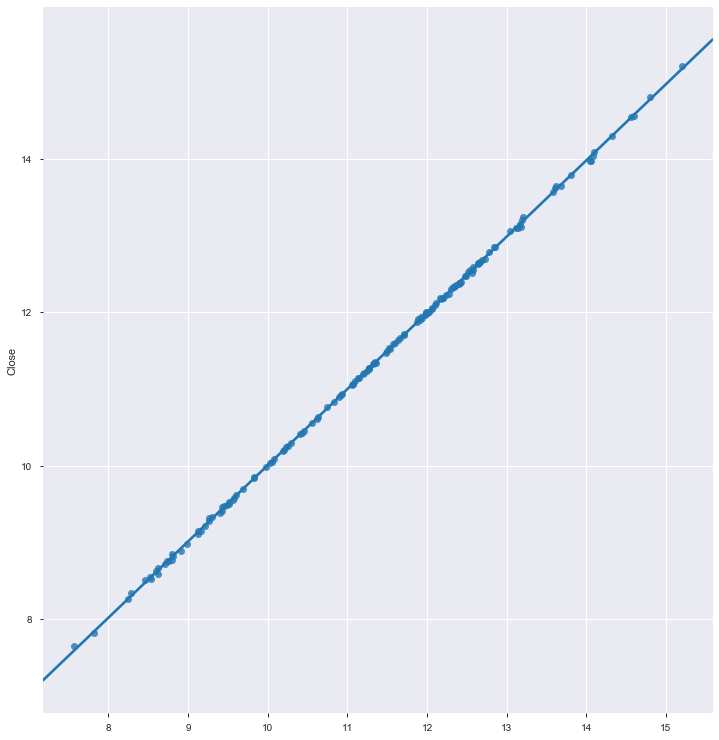

In [48]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);

In [49]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
206112,13.47,13.78,13.76,72.340,33326900.0,-0.006541,F
206113,13.42,14.01,13.50,57.552,30097000.0,0.036296,F
206114,13.90,14.27,14.12,42.804,38611900.0,0.004957,F
206115,14.15,14.44,14.19,27.998,27045900.0,0.008457,F
206116,14.46,14.75,14.49,14.250,33389600.0,0.017943,F


In [ ]:
# # pickle final model
# filename = open('AAPL_final_model.pkl', 'wb')
# pickle.dump(apple_stock, filename)
# filename.close()

In [51]:
X_test.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
630,-0.273961,-0.067254,-0.301318,-0.154934,0.395935,3.394561
817,-2.271644,-2.174843,-2.125371,-1.187412,1.176337,-1.962396
949,-0.691658,-0.765769,-0.736192,-0.445619,-0.636100,0.362137
312,0.670398,0.625240,0.640908,0.325692,-1.129065,-0.203530
655,-0.140782,-0.115428,-0.095961,-0.090765,0.329650,-1.006556
244,0.428255,0.432545,0.435551,0.193504,-0.025714,-0.537464
174,1.088096,1.070844,1.087861,0.550283,-0.653221,-0.369231
23,2.099045,2.046357,2.060286,1.062351,-0.743631,0.211132
247,0.525112,0.450611,0.453670,0.193504,-1.157555,0.376719
514,0.428255,0.408459,0.375151,0.215963,-0.354620,0.907464


In [52]:
y_test.head(10)

207050     9.84
206742    11.33
206794    11.99
206626    12.12
206477    12.65
206767    11.06
206768    11.21
206641    12.33
206433    12.85
206182    12.85
Name: Close, dtype: float64

In [53]:
stock_filter = apple.loc[apple['ticker']=='F']
#stock_filter = top_5.loc[top_5['ticker']]
print(len(stock_filter))
print (stock_filter.head())

1008
              Date   High    Low   Open  Close      Volume  Adj Close  \
206112  2015-10-01  13.78  13.47  13.76  13.67  33326900.0  10.466705   
206113  2015-10-02  14.01  13.42  13.50  13.99  30097000.0  10.711719   
206114  2015-10-05  14.27  13.90  14.12  14.19  38611900.0  10.864855   
206115  2015-10-06  14.44  14.15  14.19  14.31  27045900.0  10.956734   
206116  2015-10-07  14.75  14.46  14.49  14.75  33389600.0  11.293629   

        HL_pct_diff  daily_pct_chng ticker   SMA_5  
206112     0.023014       -0.006541      F  72.340  
206113     0.043964        0.036296      F  57.552  
206114     0.026619        0.004957      F  42.804  
206115     0.020495        0.008457      F  27.998  
206116     0.020055        0.017943      F  14.250  


In [54]:
stock_filter['Close'].mean()

11.36143850334107

In [55]:
print ('actual high', y_test[207050])
print ('predicted', round(y_pred[0]))
## talk to austin about this

actual high 9.84000015258789
predicted 10.0


In [56]:
# predict the y-values
y_pred = mystock.predict(X_test)
for i in y_pred[:5]:
    print(round(i,0))

10.0
11.0
12.0
12.0
13.0


In [57]:
# How similar are those to the actual high prices?
for i in y_test[:5]:
    print(round(i,0))

10.0
11.0
12.0
12.0
13.0


In [58]:
# the residuals are the difference between true y values and predicted y values.
residuals= y_test - y_pred
for i in residuals[:5]:
    print(round(i,0))

0.0
0.0
0.0
0.0
0.0


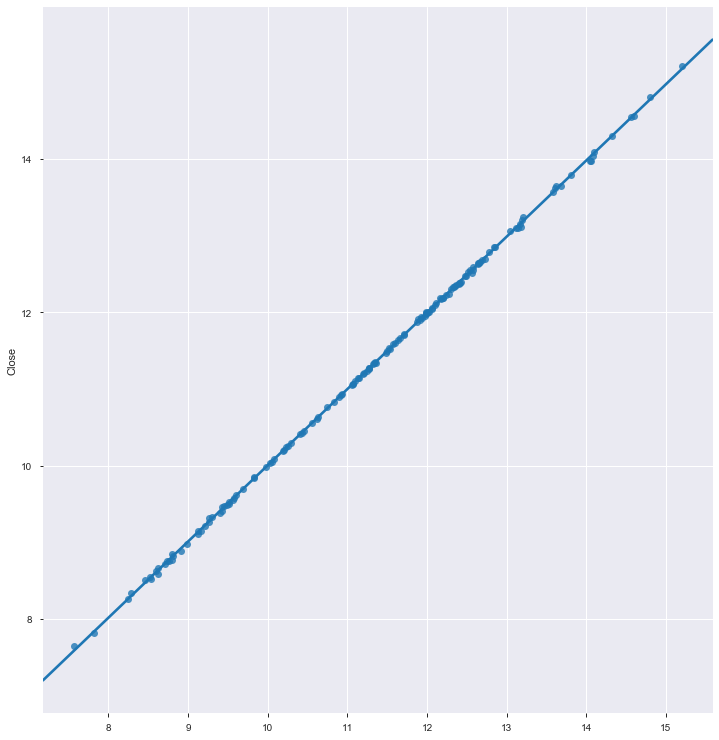

In [59]:
# Use a scatter plot to compare our predictions to the actual values
# Remember: when x==y, that indicates an accurate model! 
# Do we have that?
plt.figure(figsize=(12, 13))
sns.regplot(y_pred, y_test);

In [60]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
206112,13.47,13.78,13.76,72.340,33326900.0,-0.006541,F
206113,13.42,14.01,13.50,57.552,30097000.0,0.036296,F
206114,13.90,14.27,14.12,42.804,38611900.0,0.004957,F
206115,14.15,14.44,14.19,27.998,27045900.0,0.008457,F
206116,14.46,14.75,14.49,14.250,33389600.0,0.017943,F


In [62]:
apple.to_csv('AAPL.csv')

In [63]:
file = open('/Users/germanportes/Documents/general_assembly/projects/final_project/F_final_model.pkl', 'rb')
AAPL=pickle.load(file)
file.close()
AAPL

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)